First, we import all the needed librairies.

In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import json
import math
import time
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

We noticed that the actual data from topuniversities is not directly on the webpage, but on a separate text file, which contains json information.
Thus, we first get this json, parse it, and take the first 200 entries in it.
We noticed that the univertsity with rank 199 is actually the 198th entry, and thus the last 3 universities needs to have their rank corrected.

In [2]:
r = requests.get('https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508259845358')
raw_data = json.loads(r.text)['data'][:200]

We can print the first entry of the data to see how the informations are represented.

In [3]:
raw_data[0]

{'cc': 'US',
 'core_id': '410',
 'country': 'United States',
 'guide': '<a href="/where-to-study/north-america/united-states/guide" class="guide-link" target="_blank">United States</a>',
 'logo': '<img src="https://www.topuniversities.com/sites/default/files/massachusetts-institute-of-technology-mit_410_small_0.jpg" alt="Massachusetts Institute of Technology (MIT)  Logo">',
 'nid': '294850',
 'rank_display': '1',
 'region': 'North America',
 'score': '100',
 'stars': '6',
 'title': 'Massachusetts Institute of Technology (MIT)',
 'url': '/universities/massachusetts-institute-technology-mit'}

We can now define functions that will help us during the processing of this json.

First, process_university takes as input the raw json of a particular uni, and outputs a dictionnary containing the name, rank, country, region, number of faculty members (international and total) and number of students (international and total) for that given uni.

It uses other functions defined below.

In [4]:
def process_university(uni):
    name = uni['title']
    rank = get_rank(uni['rank_display'])
    country = uni['country']
    region = uni['region']
    
    numbers = get_numbers(uni['url'])
    info = {'name' : name, 'rank' : rank, 'country' : country, 'region' : region}
    info.update(numbers)
    return info

As there can be ties in rank, the displayed rank is not always a integer. Furthermore, as said above, the last 3 unis have incorrect ranks and need to be fixed.

In [5]:
def get_rank(rank_display):
    rank = int(rank_display.replace("=", ""))
    if rank >= 199:
        rank -= 1
    return rank

To get the number of faculty members (international and total) and number of students (international and total), we need to get another request, and this time, we will need to parse the webpage using BeautifulSoup.

By inspecting the webpage, we noticed the classes of the elements where the numbers are contained. Once we get these elements, we further need to parse its content, to get the value as an integer.

During the parsing, we noticed that one university (NYU) did not have the same template as the others, and so its number of students is unknown. 

In [6]:
def get_numbers(url):
    r = requests.get("https://www.topuniversities.com/" + url)
    soup = BeautifulSoup(r.text, 'html.parser')
    
    faculty_info = soup.select(".text .number")
    if len(faculty_info) >= 2:
        total_faculty = parse_int(faculty_info[0].decode_contents(formatter="html"))
        international_faculty = parse_int(faculty_info[1].decode_contents(formatter="html"))
    else:
        total_faculty = math.nan
        international_faculty = math.nan
    
    student_info = soup.select(".barp .number")
    if len(faculty_info) >= 2:
        total_student = parse_int(student_info[0].decode_contents(formatter="html"))
        international_student = parse_int(student_info[1].decode_contents(formatter="html"))
    else:
        total_student = math.nan
        international_student = math.nan
    return {'total_faculty' : total_faculty, 'international_faculty' : international_faculty, 'total_student' : total_student, 'international_student' : international_student}

In [7]:
def parse_int(str):
    return int(str.replace("\n", "").replace(" ", "").replace(",", ""))

In [8]:
#Only run this if you want to regenerate the .json
"""all_unis = []
for uni in raw_data:
    all_unis.append(process_university(uni))
    
with open('data1.json', 'w') as f:
    json.dump(all_unis, f)"""

"all_unis = []\nfor uni in raw_data:\n    all_unis.append(process_university(uni))\n    \nwith open('data1.json', 'w') as f:\n    json.dump(all_unis, f)"

In [9]:
with open('data1.json', 'r') as f:
    all_unis = json.load(f)

In [10]:
df = pd.DataFrame(all_unis)
df

,country,international_faculty,international_student,name,rank,region,total_faculty,total_student
0,United States,1679.0,3717.0,Massachusetts Institute of Technology (MIT),1,North America,2982.0,11067.0
1,United States,2042.0,3611.0,Stanford University,2,North America,4285.0,15878.0
2,United States,1311.0,5266.0,Harvard University,3,North America,4350.0,22429.0
3,United States,350.0,647.0,California Institute of Technology (Caltech),4,North America,953.0,2255.0
4,United Kingdom,2278.0,6699.0,University of Cambridge,5,Europe,5490.0,18770.0
5,United Kingdom,2964.0,7353.0,University of Oxford,6,Europe,6750.0,19720.0
6,United Kingdom,2554.0,14854.0,UCL (University College London),7,Europe,6345.0,31080.0
7,United Kingdom,2071.0,8746.0,Imperial College London,8,Europe,3930.0,16090.0
8,United States,635.0,3379.0,University of Chicago,9,North America,2449.0,13557.0
9,Switzerland,1886.0,7563.0,ETH Zurich - Swiss Federal Institute of Techno...,10,Europe,2477.0,19815.0


In [11]:
#df_staff_student = df.copy()
df['staff_student_ratio'] = df['total_faculty'] / df['total_student']
df.sort_values(['staff_student_ratio'], ascending=[False])[['name', 'rank', 'staff_student_ratio']]

,name,rank,staff_student_ratio
3,California Institute of Technology (Caltech),4,0.422616
15,Yale University,16,0.398323
5,University of Oxford,6,0.342292
4,University of Cambridge,5,0.292488
16,Johns Hopkins University,17,0.276353
1,Stanford University,2,0.269870
0,Massachusetts Institute of Technology (MIT),1,0.269450
185,University of Rochester,186,0.266604
18,University of Pennsylvania,19,0.266437
17,Columbia University,18,0.247115


In [12]:
#df_int_student = df.copy()
df['international_student_ratio'] = df['international_student'] / df['total_student']
df.sort_values(['international_student_ratio'], ascending=[False])[['name', 'rank', 'staff_student_ratio']]

,name,rank,staff_student_ratio
34,London School of Economics and Political Scien...,35,0.111475
11,Ecole Polytechnique Fédérale de Lausanne (EPFL),12,0.163879
7,Imperial College London,8,0.244251
198,Maastricht University,199,0.077937
47,Carnegie Mellon University,47,0.100479
6,UCL (University College London),7,0.204151
91,University of St Andrews,92,0.129545
41,The University of Melbourne,41,0.078493
126,Queen Mary University of London,127,0.116827
25,The University of Hong Kong,26,0.149006


In [13]:
df_staff_country = df.groupby('country').mean().sort_values('staff_student_ratio', ascending=False)[['staff_student_ratio']]
df_staff_country

,staff_student_ratio
country,
Russia,0.221910
Denmark,0.186580
Saudi Arabia,0.175828
Singapore,0.162279
Japan,0.155840
Malaysia,0.153893
United States,0.151151
South Korea,0.149356
France,0.144006


In [14]:
df_staff_region = df.groupby('region').mean().sort_values('staff_student_ratio', ascending=False)[['staff_student_ratio']]
df_staff_region

,staff_student_ratio
region,
North America,0.144831
Asia,0.134673
Europe,0.120003
Latin America,0.096779
Africa,0.088450
Oceania,0.075003


In [15]:
df_int_country = df.groupby('country').mean().sort_values('international_student_ratio', ascending=False)[['international_student_ratio']]
df_int_country

,international_student_ratio
country,
United Kingdom,0.351308
Australia,0.346878
Switzerland,0.313816
Hong Kong,0.312148
Austria,0.306095
Singapore,0.277091
Canada,0.252604
New Zealand,0.248971
Netherlands,0.245456


In [16]:
df_int_region = df.groupby('region').mean().sort_values('international_student_ratio', ascending=False)[['international_student_ratio']]
df_int_region

,international_student_ratio
region,
Oceania,0.329077
Europe,0.245932
North America,0.202437
Africa,0.169703
Asia,0.132394
Latin America,0.071751


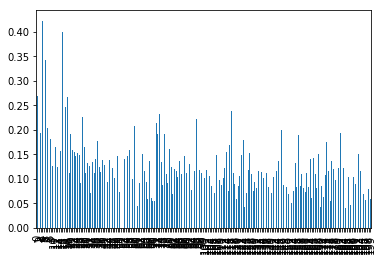

In [17]:
df.sort_values('rank')['staff_student_ratio'].plot(kind='bar')

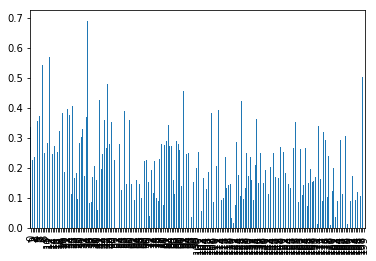

In [18]:
df.sort_values('rank')['international_student_ratio'].plot(kind='bar')

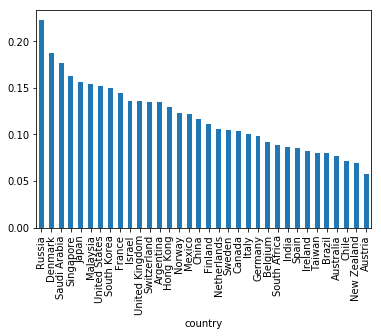

In [19]:
df_staff_country['staff_student_ratio'].plot(kind='bar')

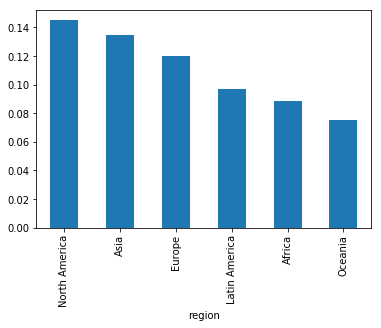

In [20]:
df_staff_region['staff_student_ratio'].plot(kind='bar')

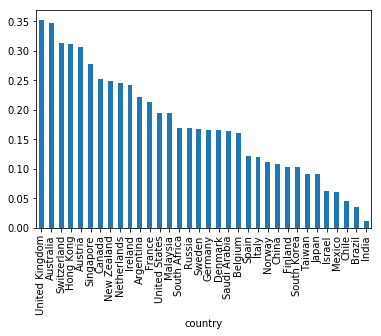

In [21]:
df_int_country['international_student_ratio'].plot(kind='bar')

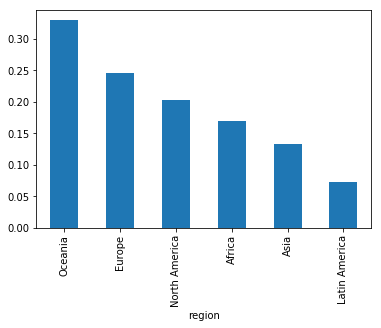

In [22]:
df_int_region['international_student_ratio'].plot(kind='bar')

In [23]:
country_region = dict(df[['country', 'region']].groupby(['country', 'region']).groups.keys())

In [24]:
r2 = requests.get('https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json')
raw_data2 = json.loads(r2.text)['data'][:200]

In [25]:
unis2 = []
for uni in raw_data2:
    name = uni['name']
    rank = uni['rank'].replace('=', '')
    country = uni['location']
    if country == 'Russian Federation':
        country = 'Russia'
    int_students = uni['stats_pc_intl_students'].replace('%', '')
    staff_student = uni['stats_student_staff_ratio']
    
    #numbers = get_numbers(uni['url'])
    info = {'name' : name, 'rank': rank, 'country': country, 'region' : country_region.get(country, 'Europe'),
            'international_student_ratio' : int(int_students) / 100.0, 'staff_student_ratio': 1 / float(staff_student)}
    #info.update(numbers)
    unis2.append(info)
df2 = pd.DataFrame(unis2)
df2

,country,international_student_ratio,name,rank,region,staff_student_ratio
0,United Kingdom,0.38,University of Oxford,1,Europe,0.089286
1,United Kingdom,0.35,University of Cambridge,2,Europe,0.091743
2,United States,0.27,California Institute of Technology,3,North America,0.153846
3,United States,0.22,Stanford University,3,North America,0.133333
4,United States,0.34,Massachusetts Institute of Technology,5,North America,0.114943
5,United States,0.26,Harvard University,6,North America,0.112360
6,United States,0.24,Princeton University,7,North America,0.120482
7,United Kingdom,0.55,Imperial College London,8,Europe,0.087719
8,United States,0.25,University of Chicago,9,North America,0.161290
9,Switzerland,0.38,ETH Zurich – Swiss Federal Institute of Techno...,10,Europe,0.068493


In [26]:
df_staff_country2 = df2.groupby('country').mean().sort_values('staff_student_ratio', ascending=False)[['staff_student_ratio']]
df_staff_country2

,staff_student_ratio
country,
Denmark,0.160166
Italy,0.138889
Russia,0.136986
Japan,0.132098
United States,0.106390
France,0.099352
China,0.087420
Taiwan,0.086957
South Africa,0.085470


In [27]:
df_staff_region2 = df2.groupby('region').mean().sort_values('staff_student_ratio', ascending=False)[['staff_student_ratio']]
df_staff_region2

,staff_student_ratio
region,
North America,0.101655
Africa,0.085470
Asia,0.080345
Europe,0.065952
Oceania,0.039895


In [28]:
df_int_country2 = df2.groupby('country').mean().sort_values('international_student_ratio', ascending=False)[['international_student_ratio']]
df_int_country2

,international_student_ratio
country,
Luxembourg,0.570000
United Kingdom,0.365484
Hong Kong,0.328000
Switzerland,0.314286
Australia,0.307500
Singapore,0.305000
New Zealand,0.290000
Ireland,0.270000
Austria,0.260000


In [29]:
df_int_region2 = df2.groupby('region').mean().sort_values('international_student_ratio', ascending=False)[['international_student_ratio']]
df_int_region2

,international_student_ratio
region,
Oceania,0.305556
Europe,0.244653
North America,0.185588
Africa,0.180000
Asia,0.165238


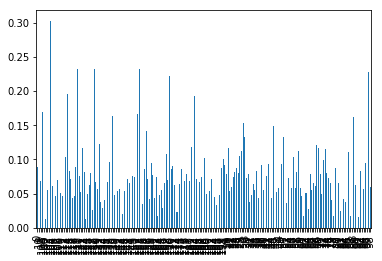

In [30]:
df2.sort_values('rank')['staff_student_ratio'].plot(kind='bar')

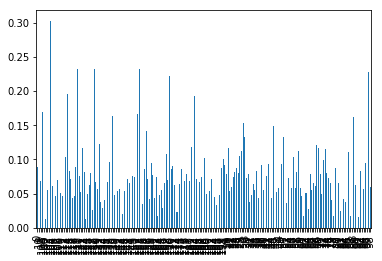

In [31]:
df2.sort_values('rank')['staff_student_ratio'].plot(kind='bar')

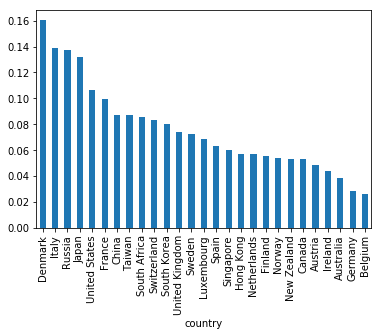

In [32]:
df_staff_country2['staff_student_ratio'].plot(kind='bar')

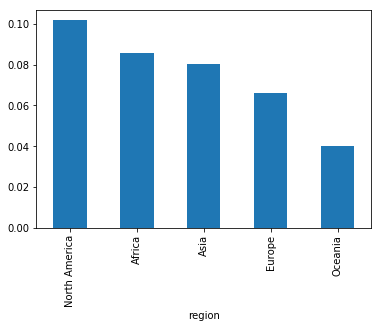

In [33]:
df_staff_region2['staff_student_ratio'].plot(kind='bar')

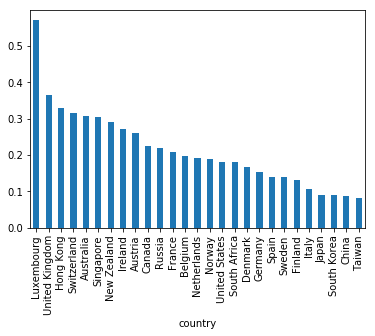

In [34]:
df_int_country2['international_student_ratio'].plot(kind='bar')

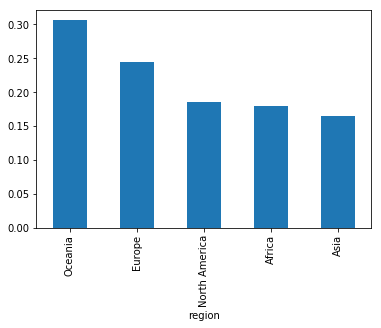

In [35]:
df_int_region2['international_student_ratio'].plot(kind='bar')

For the third question, the important part is to merge both dataframes, and thus, as sometimes the university names are not the same in both websites, we need to map them to the same value for both to perform the merge correctly.

To solve this problem, we used google search : we search for each university names in both dataframes, and take the first link output by google (usually the university website), and then use this url to perform the join.

As google blocks any device that performs too many searches, we delayed each search by 5 seconds, and then store the mapping in a json to avoid searching again each time the notebook is run.

With this technique, we have a very high rate of success, with only 3 university for which both searches didn't output the same link.

In [36]:
#mapping = {}
with open('mapping.json', 'r') as f:
    mapping = json.load(f)

In [37]:
def get_url(name):
    r = requests.get('https://encrypted.google.com/search?q=' + name.replace(' ', '+'))
    soup = BeautifulSoup(r.text, 'html.parser')
    google_url = soup.select('.g a')[0]['href']
    url = google_url[google_url.find("://")+3:google_url.find("&")]
    
    if url.endswith("/"):
        url = url[0:-1]
    
    time.sleep(5)
    return url

def get_identifier(name):
    if not(name in mapping): #if the name is already in the mapping, no need to run the search again
        mapping[name] = get_url(name)
        
    #print(name + " => " + mapping[name])
    return mapping[name]


Now that we have the mapping, we can apply it to both datasets and then merge them on the 'url' column.

In [38]:
df['url'] = df['name'].apply(get_identifier)

df2['url'] = df2['name'].apply(get_identifier)

raw_merge = df.merge(df2[['url', 'rank', 'international_student_ratio', 'staff_student_ratio']], how='inner', on='url')#.to_csv('test.csv')
raw_merge.columns = ['Country', 
                     'International faculty', 
                     'International students', 
                     'Name', 
                     'Rank topuniversities', 
                     'Region', 
                     'Total faculty', 
                     'Total students', 
                     'Faculty / students ratio topuniversities', 
                     'International students ratio topuniversities', 
                     'url', 
                     'Rank timeshighereducation', 
                     'International students ratio timeshighereducation', 
                     'Faculty / students ratio timeshighereducation']
raw_merge

,Country,International faculty,International students,Name,Rank topuniversities,Region,Total faculty,Total students,Faculty / students ratio topuniversities,International students ratio topuniversities,url,Rank timeshighereducation,International students ratio timeshighereducation,Faculty / students ratio timeshighereducation
0,United States,1679.0,3717.0,Massachusetts Institute of Technology (MIT),1,North America,2982.0,11067.0,0.269450,0.335863,web.mit.edu,5,0.34,0.114943
1,United States,2042.0,3611.0,Stanford University,2,North America,4285.0,15878.0,0.269870,0.227422,www.stanford.edu,3,0.22,0.133333
2,United States,1311.0,5266.0,Harvard University,3,North America,4350.0,22429.0,0.193945,0.234785,www.harvard.edu,6,0.26,0.112360
3,United States,350.0,647.0,California Institute of Technology (Caltech),4,North America,953.0,2255.0,0.422616,0.286918,www.caltech.edu,3,0.27,0.153846
4,United Kingdom,2278.0,6699.0,University of Cambridge,5,Europe,5490.0,18770.0,0.292488,0.356899,www.cam.ac.uk,2,0.35,0.091743
5,United Kingdom,2964.0,7353.0,University of Oxford,6,Europe,6750.0,19720.0,0.342292,0.372870,www.ox.ac.uk,1,0.38,0.089286
6,United Kingdom,2554.0,14854.0,UCL (University College London),7,Europe,6345.0,31080.0,0.204151,0.477928,www.ucl.ac.uk,16,0.49,0.095238
7,United Kingdom,2071.0,8746.0,Imperial College London,8,Europe,3930.0,16090.0,0.244251,0.543567,www.imperial.ac.uk,8,0.55,0.087719
8,United States,635.0,3379.0,University of Chicago,9,North America,2449.0,13557.0,0.180645,0.249244,www.uchicago.edu,9,0.25,0.161290
9,Switzerland,1886.0,7563.0,ETH Zurich - Swiss Federal Institute of Techno...,10,Europe,2477.0,19815.0,0.125006,0.381681,www.ethz.ch/en.html,10,0.38,0.068493


In [53]:
# First we clean the dataset
raw_merge_cleaned = raw_merge.copy()
raw_merge_cleaned['rank_time'] = 200 - raw_merge_cleaned['Rank timeshighereducation'].astype(int)
raw_merge_cleaned['rank_top'] = 200 - raw_merge_cleaned['Rank topuniversities'].astype(int)
raw_merge_cleaned[pd.notnull(raw_merge['International students ratio topuniversities'])]
raw_merge_cleaned['International faculty ratio'] = raw_merge_cleaned['International faculty'] / raw_merge_cleaned['Total faculty']

In [54]:
raw_merge_cleaned.corr()

,International faculty,International students,Rank topuniversities,Total faculty,Total students,Faculty / students ratio topuniversities,International students ratio topuniversities,International students ratio timeshighereducation,Faculty / students ratio timeshighereducation,rank_time,rank_top,International faculty ratio
International faculty,1.000000,0.579780,-0.516205,0.645592,0.286353,0.316277,0.381998,0.327211,0.013953,0.365093,0.516205,0.600152
International students,0.579780,1.000000,-0.258194,0.414110,0.627124,-0.245137,0.528667,0.417507,-0.338509,0.254831,0.258194,0.323016
Rank topuniversities,-0.516205,-0.258194,1.000000,-0.366388,-0.020634,-0.400063,-0.317166,-0.308134,-0.213109,-0.696734,-1.000000,-0.359499
Total faculty,0.645592,0.414110,-0.366388,1.000000,0.588380,0.337531,-0.083055,-0.127747,0.168920,0.364960,0.366388,-0.095990
Total students,0.286353,0.627124,-0.020634,0.588380,1.000000,-0.430598,-0.205709,-0.277173,-0.369667,0.147799,0.020634,-0.191878
Faculty / students ratio topuniversities,0.316277,-0.245137,-0.400063,0.337531,-0.430598,1.000000,0.110572,0.133461,0.696981,0.305359,0.400063,0.073430
International students ratio topuniversities,0.381998,0.528667,-0.317166,-0.083055,-0.205709,0.110572,1.000000,0.954589,-0.074607,0.223201,0.317166,0.657059
International students ratio timeshighereducation,0.327211,0.417507,-0.308134,-0.127747,-0.277173,0.133461,0.954589,1.000000,-0.033478,0.201501,0.308134,0.640265
Faculty / students ratio timeshighereducation,0.013953,-0.338509,-0.213109,0.168920,-0.369667,0.696981,-0.074607,-0.033478,1.000000,0.120484,0.213109,-0.168201
rank_time,0.365093,0.254831,-0.696734,0.364960,0.147799,0.305359,0.223201,0.201501,0.120484,1.000000,0.696734,0.131918


We notice that there is an obvious and natural correlation between the columns corresponding to the numbers of students and faculty members. Of course, it's normal than when there are more students, there are more international students as well and more faculty members. These correlations however are not interesting.

The more interesting observations are given by the ratios than the numbers.

Another uninsteresting observation are the correlations between the ratios in the two rankings.

In [55]:
raw_merge_cleaned[['Faculty / students ratio topuniversities',
                   'International students ratio topuniversities',
                   'International students ratio timeshighereducation',
                   'Faculty / students ratio timeshighereducation',
                   'International faculty ratio',
                   'rank_time',
                   'rank_top']].corr()

,Faculty / students ratio topuniversities,International students ratio topuniversities,International students ratio timeshighereducation,Faculty / students ratio timeshighereducation,International faculty ratio,rank_time,rank_top
Faculty / students ratio topuniversities,1.000000,0.110572,0.133461,0.696981,0.073430,0.305359,0.400063
International students ratio topuniversities,0.110572,1.000000,0.954589,-0.074607,0.657059,0.223201,0.317166
International students ratio timeshighereducation,0.133461,0.954589,1.000000,-0.033478,0.640265,0.201501,0.308134
Faculty / students ratio timeshighereducation,0.696981,-0.074607,-0.033478,1.000000,-0.168201,0.120484,0.213109
International faculty ratio,0.073430,0.657059,0.640265,-0.168201,1.000000,0.131918,0.359499
rank_time,0.305359,0.223201,0.201501,0.120484,0.131918,1.000000,0.696734
rank_top,0.400063,0.317166,0.308134,0.213109,0.359499,0.696734,1.000000


When looking at only the correlations involving the ratios and ranks, we can note a few interesting things. First note that we had added a new ratio that is the ratio of international faculty members (this information comes from the Top Universities ranking only).

First, we can note that the faculty/students ratio from Top Universities has a relatively high correlation with both ranks. There are two possible explanations in our opinion. First we can think that higher ranked universities may have more funds to hire more faculty staff. Secondly, we can also assume that universities with a higher rank may want to keep their high position or improve it by hiring more faculty members.

Another relatively important correlation we see is the correlation between international

In [49]:
raw_merge_cleaned[['Total students',
                   'rank_time',
                   'rank_top']].corr()

,Total students,rank_time,rank_top
Total students,1.000000,0.147799,0.020634
rank_time,0.147799,1.000000,0.696734
rank_top,0.020634,0.696734,1.000000
